In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from astropy import units,constants

from tqdm import tqdm

In [2]:
from src import utils,physics,nsphere,run_units
from src.density.nfw import NFW
from src.density.hernquist import Hernquist
from src.spatial_approximation import Lattice
from src.halo import Halo
from src.background import Mass_Distribution

# Constants and general functions

In [3]:
# Mtot = 1.0e10 * Msun #Default halo mass in solar masses (Msun).
# Rs = 2.68441 * kpc #kpc
# c = 17
Mtot_dm = units.Quantity(1.15e9,'Msun')
# Mtot_dm = units.Quantity(1.15e9,'Msun') * 10
Mtot_b = units.Quantity(1e5,'Msun')
Rs = units.Quantity(1.18,'kpc')
# Rs = units.Quantity(0.715,'kpc')
c = 19
sigma = units.Quantity(50,'cm^2/gram')
# sigma = units.Quantity(0,'cm^2/gram')

# Setup - DM

In [4]:
n_particles = 1e5
density = NFW(Rs=Rs,c=c,Mtot=Mtot_dm,unit_mass=Mtot_dm/n_particles)
steps_per_Tdyn = 1000
total_run_time = 61 * density.Tdyn
save_every = 10 * density.Tdyn

halo = Halo.setup(density=density,steps_per_Tdyn=steps_per_Tdyn,n_particles=n_particles,sigma=sigma,save_every=save_every,
                  total_run_time=total_run_time,ensure_energy_conservation=False)

In [ ]:
halo.evolve(t=61*halo.Tdyn)

In [10]:
'{x}+r'.format(x=5,y=4)

'5+r'

Text(0.5, 1.0, 'Scattering location distribution within the first $0.0 \\; \\mathrm{Gyr}$, total of 178 events')

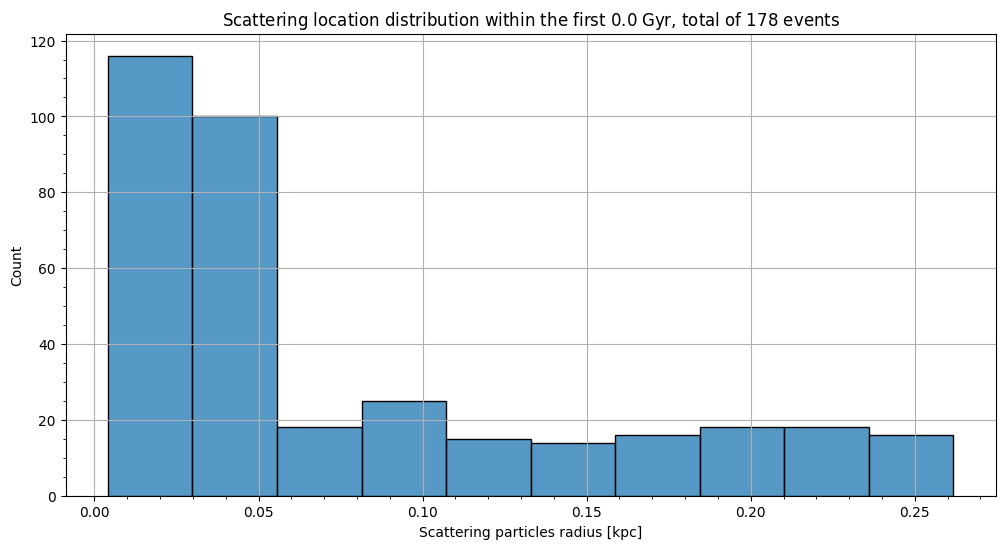

In [6]:
fig,ax = plt.subplots(figsize=(12,6))
sns.histplot(np.hstack(halo.interactions_track),ax=ax)
ax.minorticks_on()
ax.grid(True)
ax.set_xlabel('Scattering particles radius [kpc]')
ax.set_title(f'Scattering location distribution within the first {halo.time.to('Gyr').to_string(format="latex",formatter=".1f")}, total of {halo.n_interactions} events')

In [6]:
halo.saved_states.to_csv('states dm.csv')

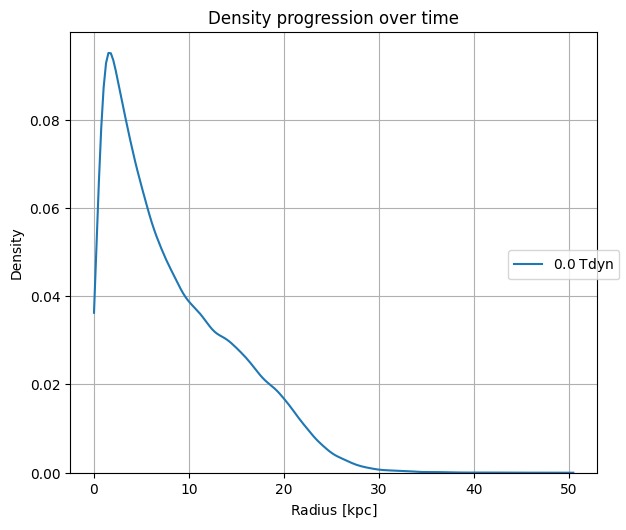

In [8]:
halo.plot_r_density_over_time(clip=units.Quantity([0,70],'kpc'));

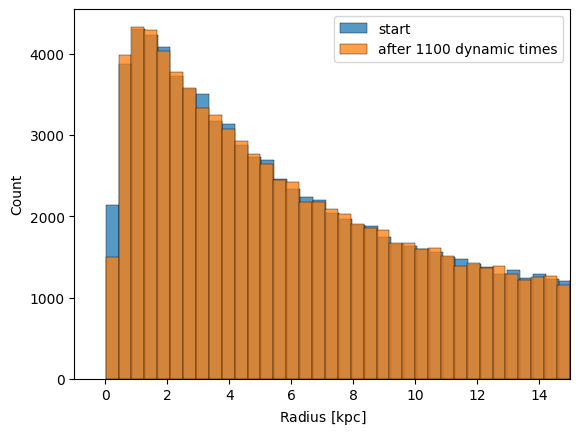

In [9]:
ax = sns.histplot(halo.initial_particles['r'])
sns.histplot(halo.particles['r'][halo.particles['r']<50*units.kpc],ax=ax)
ax.set_xlim((-1,15))
ax.set_xlabel(utils.add_label_unit('Radius',halo.particles['r'].unit))
ax.legend(['start','after 1100 dynamic times'])

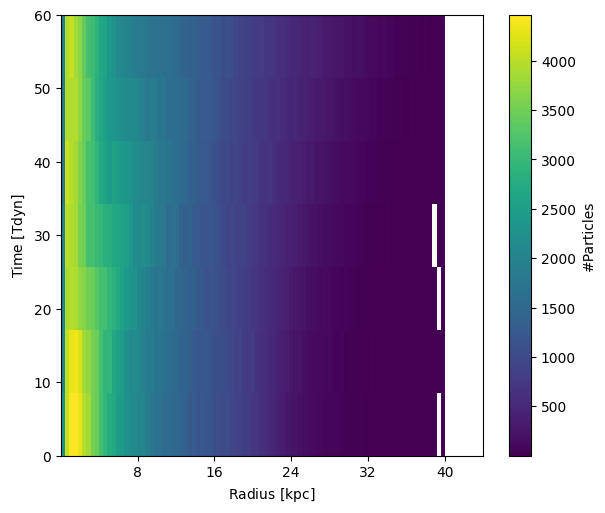

In [9]:
halo.plot_density_evolution();

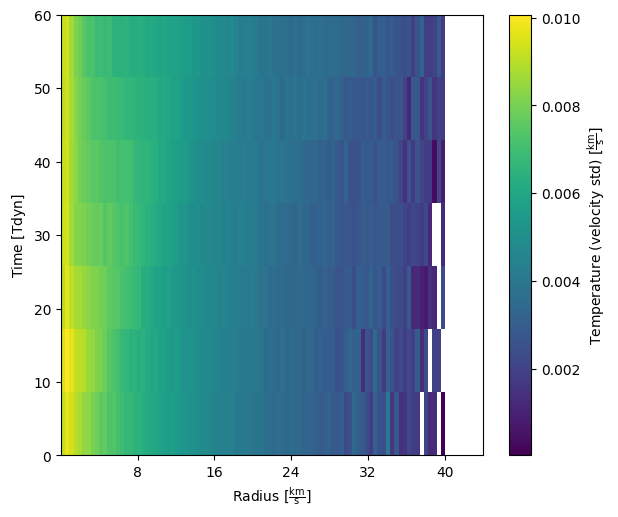

In [10]:
halo.plot_temperature();

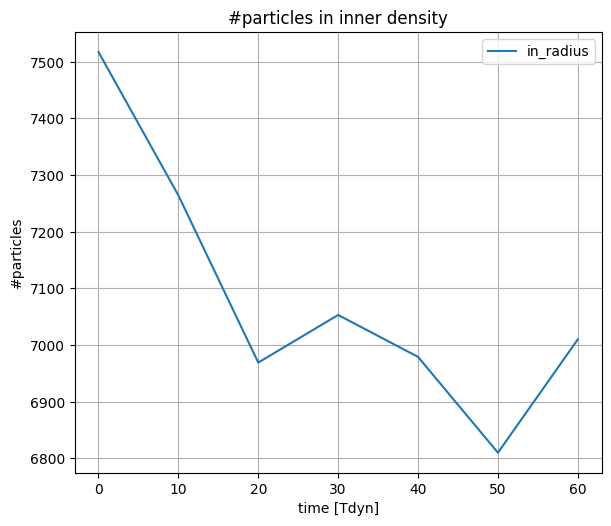

In [16]:
halo.plot_inner_core_density(radius=1*units.kpc);

# Setup - B matter

In [9]:
n_particles = int(1e5)
dm_density = NFW(Rs=Rs,c=c,Mtot=Mtot_dm,unit_mass=Mtot_dm/n_particles)
density = Hernquist(Rs=Rs,Mtot=Mtot_b,unit_mass=Mtot_b/n_particles)
density.Tdyn = dm_density.Tdyn
steps_per_Tdyn = 1000
total_run_time = 1100 * density.Tdyn
save_every = 10*density.Tdyn

halo = Halo.setup(density=density,steps_per_Tdyn=steps_per_Tdyn,n_particles=n_particles,sigma=0,save_every=save_every,
                  total_run_time=total_run_time,mass_calculation_method='lattice')
halo.add_background(Mass_Distribution.from_files(halo.lattice,Mtot=Mtot_dm,base_filename='Rank_Mass_Rad_VRad_unsorted',ntimesteps=12525000,tfinal=1100,
                                                 max_time=19.605*Gyr,root_path='../../NSphere-SIDM/data'))

Load files: 100%|███████████████████████████████████████████████████████| 501/501 [00:02<00:00, 180.20it/s]


In [8]:
# halo.reset()
halo.evolve(n_Tdyn=1100)
# halo.evolve(n_Tdyn=81)
# halo.evolve(n_Tdyn=6)
# halo.evolve(n_Tdyn=1)

100%|███████████████████████████████████████████████████████████| 1100000/1100000 [44:02<00:00, 416.32it/s]


In [13]:
halo.saved_states.to_csv('states dm.csv')

In [ ]:
fig,ax = halo.plot_r_density_over_time(clip=(0,70))

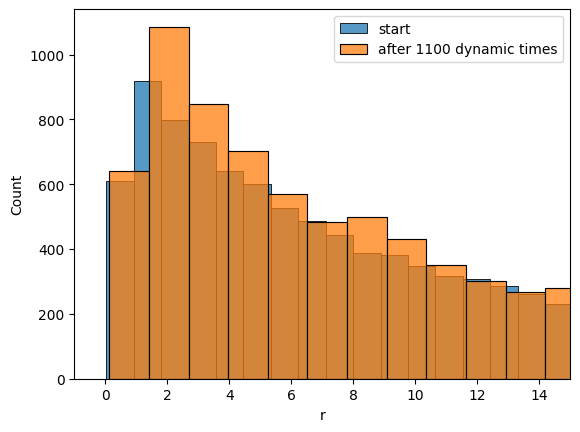

In [14]:
ax = sns.histplot(halo.initial_particles.r/kpc)
sns.histplot((halo.particles.r/kpc)[(halo.particles.r/kpc) < 50],ax=ax)
ax.set_xlim((-1,15))
ax.legend(['start','after 1100 dynamic times'])

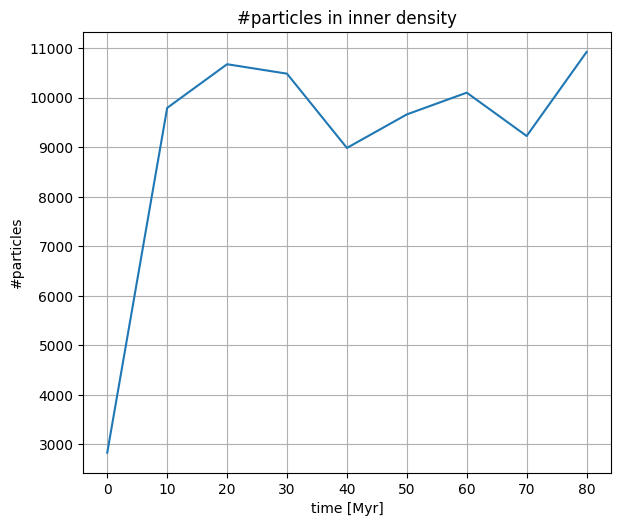

In [21]:
halo.plot_inner_core_density();

In [10]:
halo.saved_states.to_csv('states high amount.csv')

In [34]:
(data.time.unique() <= 12).argmin()

np.int64(68)

In [43]:
from src import nsphere
nsphere.gather_files(base_filename='Rank_Mass_Rad_VRad_unsorted',ntimesteps=12550000,tfinal=1100,
                     max_time=19.605*Gyr,root_path='../../NSphere-SIDM/data/results')

,path,save_step,time,record_dtype
106,../../NSphere-SIDM/data/results/Rank_Mass_Rad_...,0,0.000000,"[('rank', '<i4'), ('mass', '<f4'), ('R', '<f4'..."
211,../../NSphere-SIDM/data/results/Rank_Mass_Rad_...,2,78.107570,"[('rank', '<i4'), ('mass', '<f4'), ('R', '<f4'..."
173,../../NSphere-SIDM/data/results/Rank_Mass_Rad_...,4,156.215139,"[('rank', '<i4'), ('mass', '<f4'), ('R', '<f4'..."
114,../../NSphere-SIDM/data/results/Rank_Mass_Rad_...,6,234.322709,"[('rank', '<i4'), ('mass', '<f4'), ('R', '<f4'..."
240,../../NSphere-SIDM/data/results/Rank_Mass_Rad_...,8,312.430279,"[('rank', '<i4'), ('mass', '<f4'), ('R', '<f4'..."
...,...,...,...,...
39,../../NSphere-SIDM/data/results/Rank_Mass_Rad_...,493,19253.515936,"[('rank', '<i4'), ('mass', '<f4'), ('R', '<f4'..."
107,../../NSphere-SIDM/data/results/Rank_Mass_Rad_...,495,19331.623506,"[('rank', '<i4'), ('mass', '<f4'), ('R', '<f4'..."
54,../../NSphere-SIDM/data/results/Rank_Mass_Rad_...,497,19409.731076,"[('rank', '<i4'), ('mass', '<f4'), ('R', '<f4'..."
205,../../NSphere-SIDM/data/results/Rank_Mass_Rad_...,499,19487.838645,"[('rank', '<i4'), ('mass', '<f4'), ('R', '<f4'..."


In [48]:
np.sqrt(Rs**3/(G*Mtot_dm))

np.float64(17.833703762020537)

In [46]:
40/halo.Tdyn

np.float64(2.2429440644397047)

In [61]:
from matplotlib.colors import PowerNorm
norm=PowerNorm(gamma=3/4,vmin=vmin,vmax=vmax)

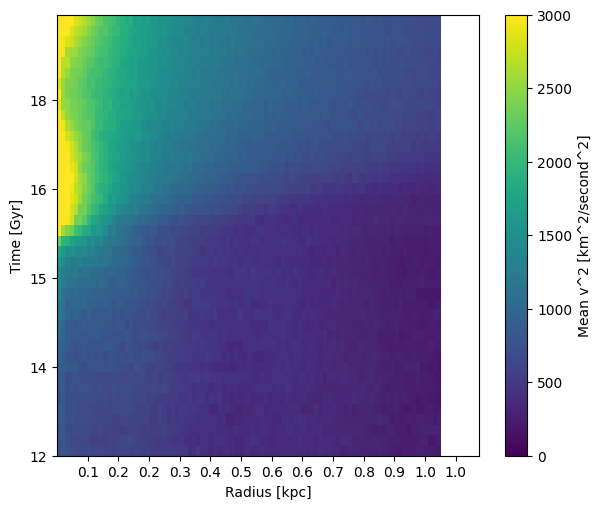

In [97]:
data = halo.saved_states.copy()
data['output'] = (data.v_norm/(km/second))**2
time_units={'name':'Gyr','value':Gyr}
length_units={'name':'kpc','value':kpc}
grid,extent = halo.prep_2d_data(data,radius_cutoff=1*kpc,x_units=length_units,time_units=time_units,agg_fn='mean')

grid = grid[68:]
extent = (extent[0],extent[1],12,extent[3])

plot_2d(grid,extent=extent,x_units=length_units,y_units=time_units,xlabel='Radius [{name}]',ylabel='Time [{name}]',cbar_label='Mean v^2 [km^2/second^2]',
        x_nbins=15,x_tick_format='%.1f');

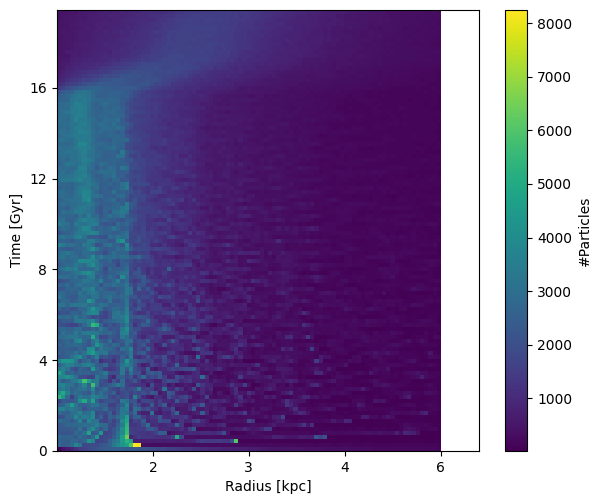

In [13]:
halo.plot_density_evolution(radius_cutoff=6*kpc,time_units={'name':'Gyr','value':Gyr});

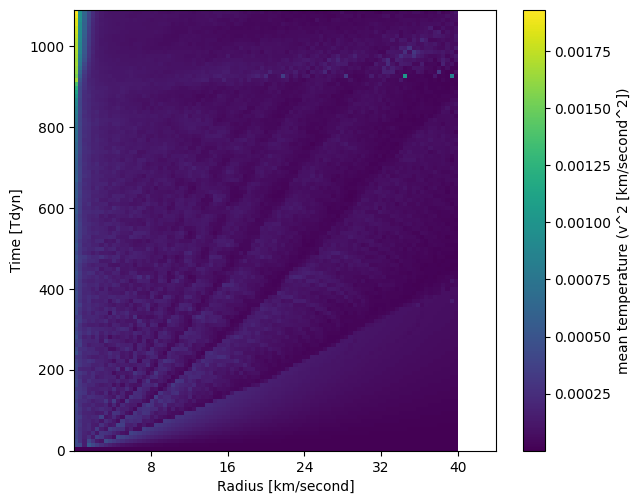

In [51]:
halo.plot_temperature();

## dm plots

In [8]:
data = nsphere.to_saved_state_like(nsphere.load_all_files(base_filename='Rank_Mass_Rad_VRad_unsorted',ntimesteps=12525000,tfinal=1100,
                                                          max_time=19.605*Gyr,root_path='../../NSphere-SIDM/data'))

Load files: 100%|███████████████████████████████████████████████████████| 501/501 [00:01<00:00, 346.59it/s]


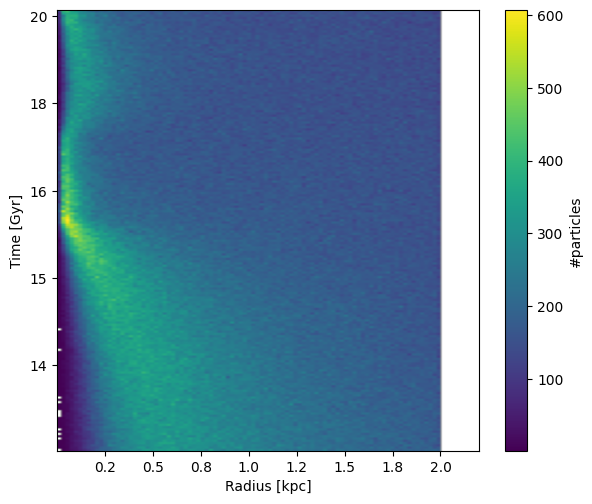

In [17]:
data['output'] = (data.v_norm/(km/second))**2
time_units={'name':'Gyr','value':Gyr}
length_units={'name':'kpc','value':kpc}
grid,extent = halo.prep_2d_data(data,radius_range=(0,2*kpc),time_range=(12*Gyr,20*Gyr),x_units=length_units,time_units=time_units,agg_fn='count')

utils.plot_2d(grid,extent=extent,x_units=length_units,y_units=time_units,xlabel='Radius [{name}]',ylabel='Time [{name}]',cbar_label='#particles',
              x_nbins=10,x_tick_format='%.1f');

/home/rotembarnea/Documents/SIDM/pySIDM/src/halo.py:293: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  agg_data = pd.concat([agg_data,pad]).drop_duplicates(['time','bin']).sort_values(['time','bin'])


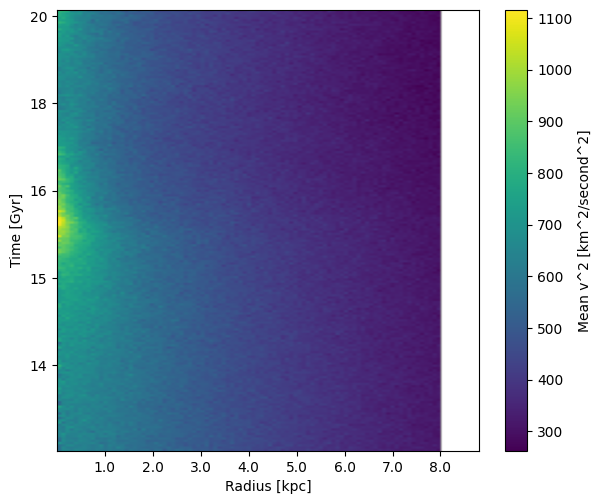

In [26]:
data['output'] = (data.v_norm/(km/second))**2
time_units={'name':'Gyr','value':Gyr}
length_units={'name':'kpc','value':kpc}
grid,extent = halo.prep_2d_data(data,radius_range=(0,8*kpc),x_units=length_units,time_units=time_units,agg_fn='mean')

utils.plot_2d(grid,extent=extent,x_units=length_units,y_units=time_units,xlabel='Radius [{name}]',ylabel='Time [{name}]',
              cbar_label='Mean v^2 [km^2/second^2]');

In [68]:
data = nsphere.load_all_files(base_filename='Rank_Mass_Rad_VRad_unsorted',ntimesteps=12525000,tfinal=1100,
                              max_time=19.605*Gyr,root_path='../../NSphere-SIDM/data')
data['v^2'] = data['Vrad']**2+(data['L']/data['R'])**2
data['time'] /= Gyr

Load files: 100%|███████████████████████████████████████████████████████| 501/501 [00:02<00:00, 212.54it/s]


In [72]:
data['Etot'] = data['E'] + data['PsiA']

In [ ]:
agg_data_E = data.groupby('time').E.agg('sum')
agg_data_Etot = data.groupby('time').E_tot.agg('sum')
agg_data_v2 = data.groupby('time')['v^2'].agg('sum')

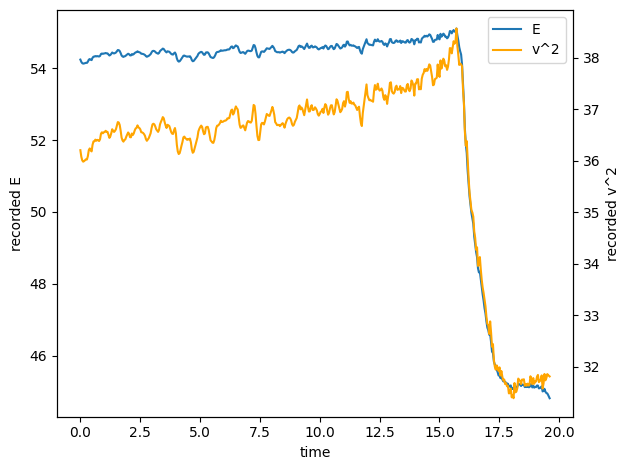

In [70]:
fig,ax1 = plt.subplots()
ax = sns.lineplot(agg_data_E,label='E')
ax1.set_ylabel('recorded E')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
sns.lineplot(data=agg_data_v2,ax=ax2,color='orange',label='v^2')
ax2.set_ylabel('recorded v^2')
ax2.tick_params(axis='y')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.get_legend().remove()
ax2.get_legend().remove()
ax1.legend(lines1 + lines2, ['E', 'v^2'], loc='upper right')

# Add title and show
plt.tight_layout()

# Results:

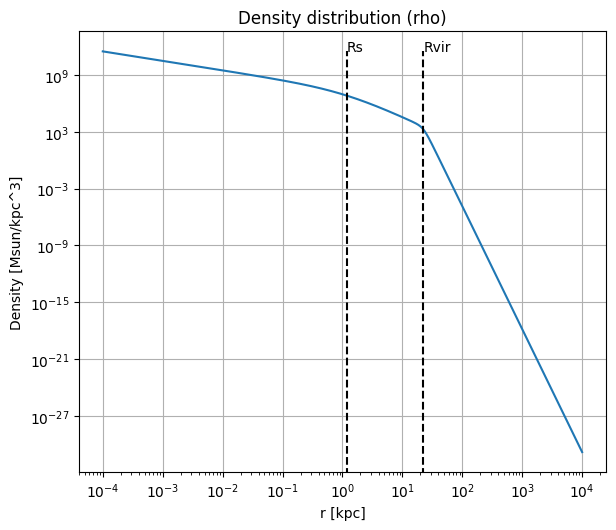

In [5]:
halo.density.plot_rho();

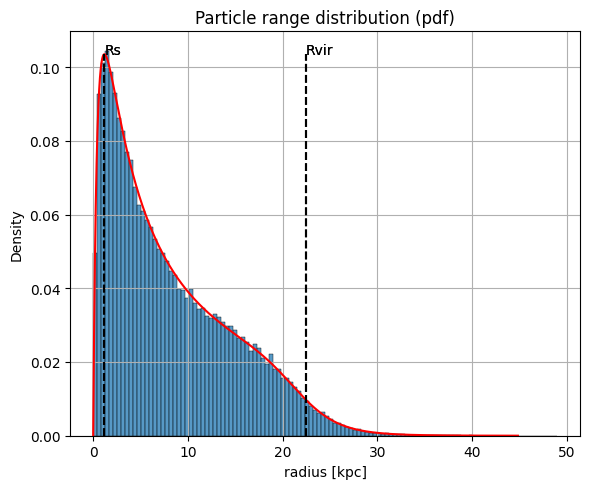

In [5]:
halo.plot_r_distribution(halo.initial_particles,cumulative=False);

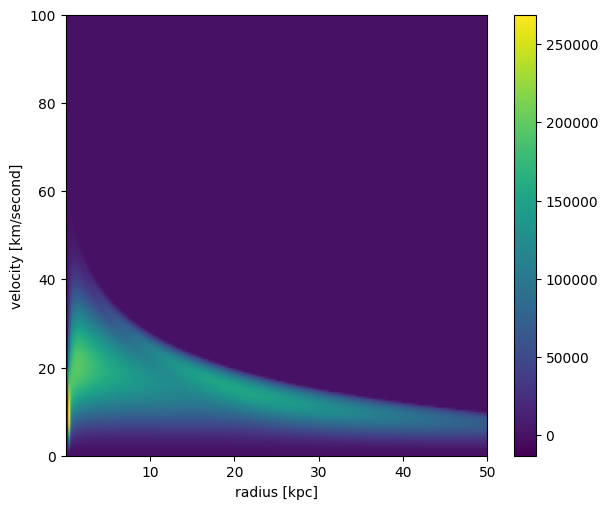

In [9]:
halo.density.plot_phase_space();

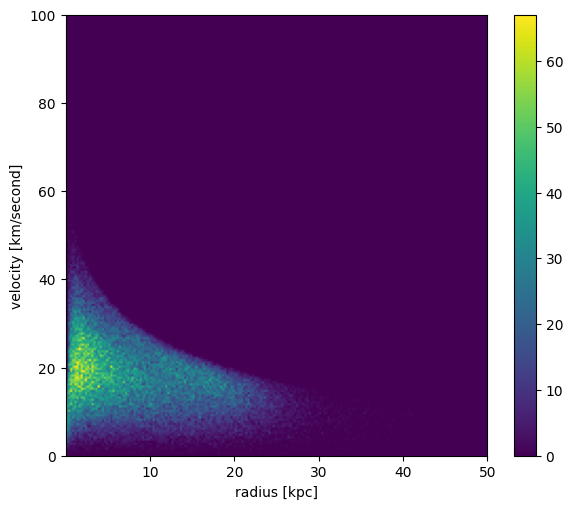

In [10]:
halo.plot_phase_space(halo.initial_particles);